In [1]:
# Import for Neural Network
from NeuralNetwork import MultiLayerPerceptron as mlpLib
from sklearn import datasets

import numpy as np

In [2]:
# How create a MLP object
#mlp = mlpLib.MLP(rng=np.random.RandomState(), n_in=4, n_hidden=[10, 9, 9, 11], n_out=3)

In [8]:
# load data
iris = datasets.load_iris()
input = np.array(iris.data[1:3,:])
print 'Input: \n', input

# propagating input throught each layer

# input layer
print '\nmlp.InputLayer.GetOutput(input): \n',mlp.InputLayer.GetOutput(input).eval()
input_output = mlp.InputLayer.GetOutput(input).eval()

# all hidden layers
# hidden 0 layer
print '\nmlp.HiddenLayer[0].GetOutput(input).eval(): \n',mlp.HiddenLayer[0].GetOutput(input_output).eval()
hidden_output = mlp.HiddenLayer[0].GetOutput(input_output).eval()

# output layer
#print '\nmlp.OutputLayer.GetOutput(hidden_output).eval(): \n',mlp.OutputLayer.GetOutput(hidden_output).eval()

# mlp object
print '\nmlp.GetOutput(input,show=False): \n',mlp.GetOutput(input).eval()

Input: 
[[ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]]

mlp.InputLayer.GetOutput(input): 
[[ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]]

mlp.HiddenLayer[0].GetOutput(input).eval(): 
[[ 0.99995102  0.78557752  0.40869636 -0.99984988  0.87778838 -0.09019301
  -0.99822116  0.99942329 -0.64216613  0.96069918]
 [ 0.99994577  0.69814439  0.43856452 -0.9998155   0.85881802 -0.19581742
  -0.99826683  0.9993947  -0.62315505  0.96619594]]

mlp.GetOutput(input,show=False): 
[[ 0.40342941  0.39027086 -0.3065106 ]
 [ 0.37674415  0.41387543 -0.30746338]]


In [14]:
# Test L1Regularization
print "L1Reg: ", mlp.GetL1Reg().eval()

# Test L2Regularization
print "L2Reg: ", mlp.GetL2Reg().eval()

L1Reg:  37.6365235788
L2Reg:  14.9499002152


In [75]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

from NeuralNetwork import MultiLayerPerceptron


iris = datasets.load_iris()
X = iris.data
Y = iris.target

target = np.zeros([X.shape[0],3])

for i in xrange(X.shape[0]):
    target[i,Y[i]] = 1

# StandardScaler
X_scaled = preprocessing.scale(X)

mlp = mlpLib.MLP(rng=np.random.RandomState(), n_in=X.shape[1], n_hidden=[100], n_out=target.shape[1])

trn_params = mlpLib.TrainParameters(n_epochs=500,show_freq=10)

trn_desc = mlp.Train(X_scaled,target,trn_params)


Train Function
Starting Train Process with the follow parameters:
Performance Function:  mse
L1 Regularization Value:  0.0
L2 Regularization Value:  0.0001
Number of Epochs:  500
Frequency of Show:  10
Show Precision:  4
Stop Epochs:  5
Learning Rate:  0.01
Batch Size:  10
Train Indeces:  None
Test Indeces:  None
Validation Indeces:  None
Percentage of Train Events:  0.5
Percentage of Test Events:  0.25
Percentage of Validation Events:  0.25


Training...
Epoch 0010 - trn Cost: 0.123 - tst Cost: 0.095 - val Cost: 0.095 - Best Epoch: 0010 - val Cost: 0.095
Epoch 0020 - trn Cost: 0.113 - tst Cost: 0.084 - val Cost: 0.084 - Best Epoch: 0020 - val Cost: 0.084
Epoch 0030 - trn Cost: 0.110 - tst Cost: 0.081 - val Cost: 0.081 - Best Epoch: 0030 - val Cost: 0.081
Epoch 0040 - trn Cost: 0.109 - tst Cost: 0.080 - val Cost: 0.080 - Best Epoch: 0040 - val Cost: 0.080
Epoch 0050 - trn Cost: 0.109 - tst Cost: 0.079 - val Cost: 0.079 - Best Epoch: 0050 - val Cost: 0.079
Epoch 0060 - trn Cost: 0.108 -

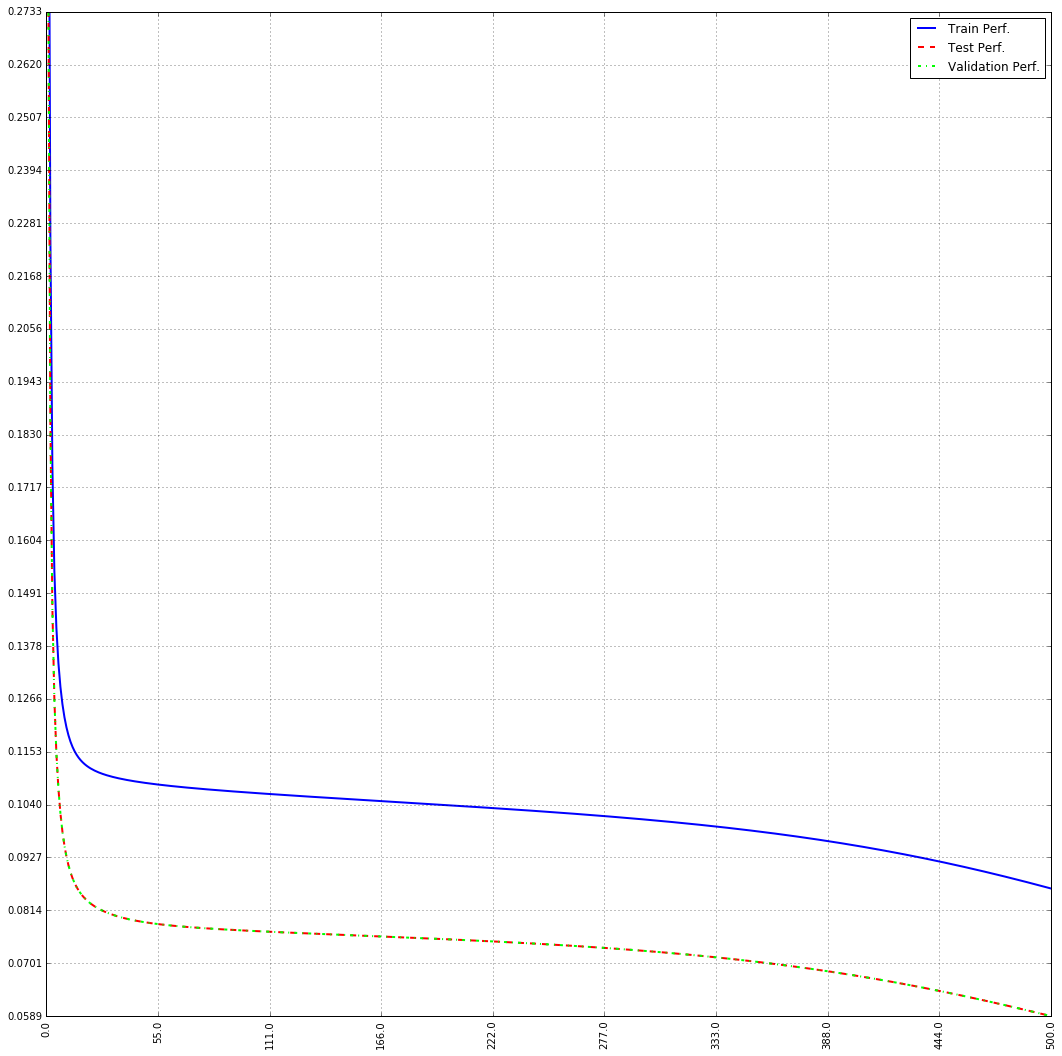

In [76]:
# plot train updates


import matplotlib.pyplot as plt
%matplotlib inline  


fig1 = plt.figure(figsize=(18,18))

x = np.linspace(0,1,trn_params.n_epochs)

l1 = plt.plot(x,trn_desc['perf'],color=[0,0,1],linewidth=2.0,linestyle='solid',label='Train Perf.')
l2 = plt.plot(x,trn_desc['tperf'],color=[1,0,0],linewidth=2.0,linestyle='dashed',label='Test Perf.')
l3 = plt.plot(x,trn_desc['vperf'],color=[0,1,0],linewidth=2.0,linestyle='dashdot',label='Validation Perf.')

y_min = np.min([trn_desc['perf'],trn_desc['tperf'],trn_desc['vperf']])
y_max = np.max([trn_desc['perf'],trn_desc['tperf'],trn_desc['vperf']])
plt.ylim([y_min,y_max/2])

plt.yticks(np.linspace(y_min,y_max/2,num=20))
plt.xticks(np.linspace(0,1,num=10),np.floor(np.linspace(0,trn_params.n_epochs,num=10)),rotation='vertical')
plt.grid(True)

plt.legend()
